# How does a Deep Learning Network Learn

## Universal Approximation

$$ Z = 2X^2 - 3Y^2 + 5 + \epsilon $$

### Create a noisy data

In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
n = 100
start = -10
end = 10
step = (end - start) / n

In [4]:
x = np.arange(start, end, step)
y = np.arange(start, end, step)

### Create this function

In [5]:
X, Y = np.meshgrid(x,y)

In [6]:
X.shape, Y.shape

((100, 100), (100, 100))

In [7]:
C = np.ones((n, n))
e = np.random.rand(n,n)

In [8]:
Z = 2*X*X - 3*Y*Y + 5*C + e

## Plot the function

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
def plot3d(X,Y,Z):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(X, Y, Z, color = "b")
    plt.show

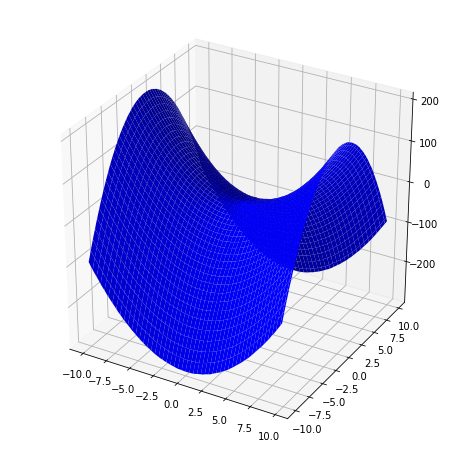

In [11]:
plot3d(X,Y,Z)

### Create the input and output shape

In [13]:
input_xy = np.c_[X.reshape(-1), Y.reshape(-1)]
input_xy.shape

(10000, 2)

In [14]:
output_z = Z.reshape(-1)
output_z.shape

(10000,)

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
input_xy_train, input_xy_test, output_z_train, output_z_test = train_test_split(
    input_xy, output_z, test_size=0.2, random_state=1234)

In [18]:
input_xy_train.shape, input_xy_test.shape, output_z_train.shape, output_z_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

## Create the model and Learn

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [64]:
model = Sequential()
model.add(Dense(40, input_dim = 2, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(1))

In [69]:
model.compile(loss = "mse", optimizer="adam", metrics=['mse'])

In [77]:
from helpers import MetricHistory

In [78]:
history = MetricHistory()

In [98]:
# Callback to save log files for tensorboard
tbCallBack = keras.callbacks.TensorBoard(log_dir='logs/simple-model')

After training - run this on the terminal

```
For Rorodata
/opt/rorodata/roro-tensorboard  logs/simple-model

For local
tensorboard --logdir=logs/simple-model
```

In [102]:
%time
history = model.fit(input_xy_train, output_z_train, 
                    batch_size=10, epochs=20, verbose=1, validation_split=0.2,
                   callbacks =[tbCallBack, history])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16 µs
Train on 6400 samples, validate on 1600 samples
Epoch 1/20
6400/6400 [==============================] - 1s 175us/step - loss: 1.0520 - mean_squared_error: 1.0520 - val_loss: 0.7890 - val_mean_squared_error: 0.7890
Epoch 2/20
6400/6400 [==============================] - 1s 175us/step - loss: 1.2099 - mean_squared_error: 1.2099 - val_loss: 1.9663 - val_mean_squared_error: 1.9663
Epoch 3/20
6400/6400 [==============================] - 1s 174us/step - loss: 0.9462 - mean_squared_error: 0.9462 - val_loss: 1.7845 - val_mean_squared_error: 1.7845
Epoch 4/20
6400/6400 [==============================] - 1s 173us/step - loss: 1.2289 - mean_squared_error: 1.2289 - val_loss: 0.8805 - val_mean_squared_error: 0.8805
Epoch 5/20
6400/6400 [==============================] - 1s 173us/step - loss: 0.9284 - mean_squared_error: 0.9284 - val_loss: 1.1165 - val_mean_squared_error: 1.1165
Epoch 6/20
6400/6400 [==============================] - 1s 1

In [81]:
Z_pred = model.predict(input_xy).reshape(n,n)

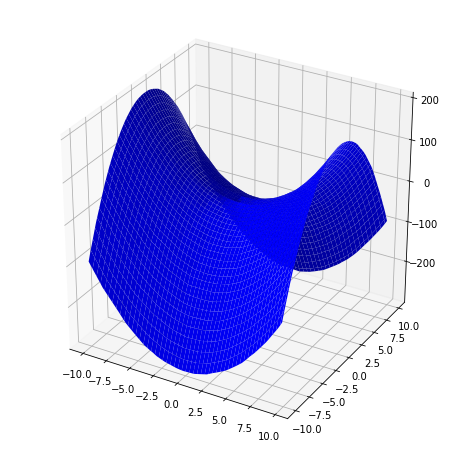

In [82]:
plot3d(X,Y,Z_pred)

In [84]:
type(history.history)

dict

In [86]:
len(history.history['loss']), len(history.history['val_loss'])

(20, 20)

In [96]:
def plot_metrics(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(loss)+1)
    plt.plot(epochs, loss, 'b', label="Training Loss" )
    plt.plot(epochs, val_loss, 'b', label="Validation Loss" )
    plt.legend()
    plt.show()

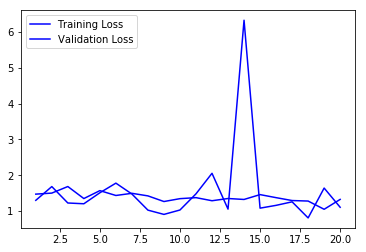

In [97]:
plot_metrics(history)